In [3]:
from sqlalchemy import create_engine
import psycopg2
from config import db_pass

conn_string = f"host='localhost' dbname='sqlchallenge' user='postgres' password={db_pass}"
conn = psycopg2.connect(conn_string)

In [6]:
import pandas as pd
salaries_df = pd.read_sql("SELECT * from Salaries", conn)
salaries_df.head()

,emp_no,salary
0,10001.0,60117.0
1,10002.0,65828.0
2,10003.0,40006.0
3,10004.0,40054.0
4,10005.0,78228.0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001A8F813C828>]],
      dtype=object)

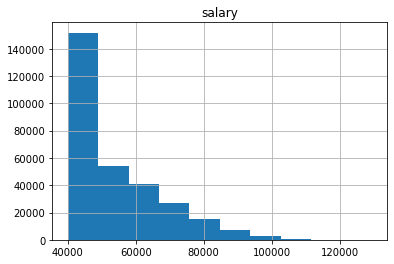

In [9]:
# salaries_df.plot(kind='hist', on="salary")
salaries_df.hist('salary')

In [12]:
avg_salary_df = pd.read_sql("select\
    d.dept_name,\
    avg(s.salary)\
    from salaries as s\
    join employees as e on s.emp_no = e.emp_no\
    join dept_emp as de on e.emp_no = de.emp_no\
    join departments as d on d.dept_no = de.dept_no\
    group by d.dept_name", conn)

avg_salary_df

,dept_name,avg
0,Customer Service ...,47998.670441
1,Development ...,48697.334663
2,Finance ...,59533.516546
3,Human Resources ...,44678.646801
4,Marketing ...,61095.897383
5,Production ...,48760.450827
6,Quality Management ...,46456.005717
7,Research ...,48850.189719
8,Sales ...,69832.127151


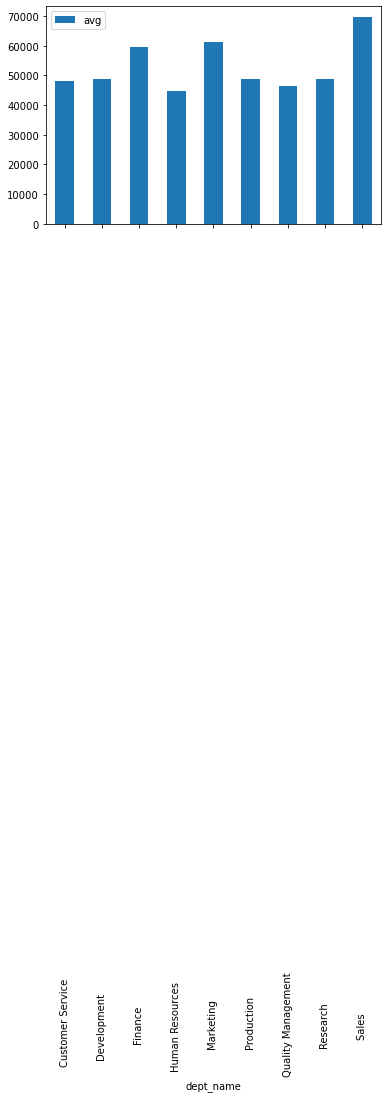

In [13]:
avg_salary_df.plot(kind='bar', x='dept_name', y='avg')